# Analysis And Prediction Of Medical Expenses

## The objective:

 The objective of this project is to analyse the data from this insurance company of past medical records and charges and :

 * Clean the data before use
 * Analyse the data to undertsand the distributions and different relationships that exist in the data
 * Create a machine learning model , specifically linear regression to predict charges of new clients and determine its accuracy.
 * Provide a numerical means to customers and the insurance company for undertsanding the decisions taken by the model.

### Importing the necessary libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [69]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize']= (10,8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [70]:
from urllib.request import urlretrieve as urt

### Obtaining the data to be analysed

In [71]:
#medical_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
#urt(medical_url,'medical_records.csv')

#### 1. Data loading

In [72]:
medical_df = pd.read_csv('medical_records.csv')

In [73]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [74]:
medical_df.sample(5)

,age,sex,bmi,children,smoker,region,charges
1148,55,male,21.500,1,no,southwest,10791.96000
366,56,female,32.300,3,no,northeast,13430.26500
844,53,male,30.495,0,no,northeast,10072.05505
719,58,female,33.440,0,no,northwest,12231.61360
472,19,female,29.800,0,no,southwest,1744.46500


There are no null values in any column and the datatypes are correct for each column.

We may thus proceed to anomaly detection of data in any of the columns

In [75]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The charges column has a very high standard deviation which shows a hiuge variation  unlike the other columns.

Overall, the data looks to be free from general anomalies in any of the columns. Further investigation of outliers maybe will be carried out.

In [76]:
corr_matrix= medical_df[['age','bmi','children','charges']].corr()

<Axes: >

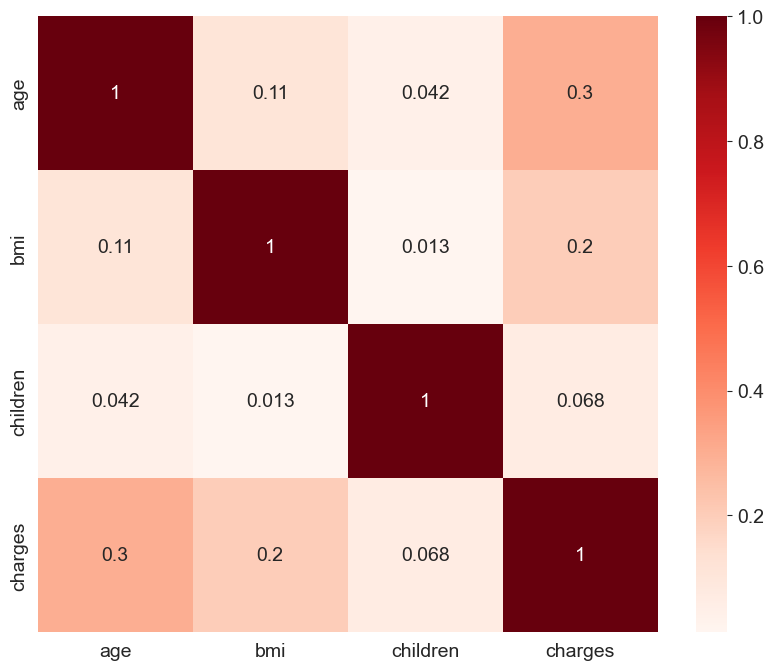

In [77]:
sns.heatmap(corr_matrix,cmap='Reds',annot=True)

Since charges is our target variable, we can observe that age and bmi have a high positive correlation with charges

#### 2. Understanding the data with visualisations

The data visualisation will be in form of:
* distributions of the different columns
* relationships between the different columns and the target column(charges)

### Distributions

In [78]:
fig = px.histogram(
    medical_df,x='age',
    marginal='box',
    title='Distribution of age',
    nbins=47,
    color_discrete_sequence = ['grey','red'],
    color='smoker'
    )

fig.update_layout(bargap = 0.1)
fig.show()

In [79]:
fig = px.histogram(
    medical_df,x='age',
    marginal='box',
    title='Distribution of age',
    nbins=47,
    color='sex'
    )

fig.update_layout(bargap = 0.1)
fig.show()

Its is observed the age follows a uniform distribution with a mean of 39 years generally except for a high number of people at the age of 18 and 19, this could be due to a number of reasons, the most probable being waiver fees for early registration or registration campaigns for new insurance signups

In [80]:
fig= px.histogram(
    medical_df,
    x='bmi',
    marginal='box',
    color_discrete_sequence =['grey','green'],
    title='Distribution of BMI',
    color='smoker',
)
fig.update_layout(bargap = 0.1)
fig.show()

In [81]:
fig= px.histogram(
    medical_df,
    x='bmi',
    marginal='box',
    title='Distribution of BMI',
    color='sex',
)
fig.update_layout(bargap = 0.1)
fig.show()

We can observe the BMI follows a normal distribution with most of the people having a BMI between 26 and 35 with a median of 30.

In [82]:
fig = px.histogram(
    medical_df,
    x='children',
    color_discrete_sequence=['grey','purple'],
    title='Distribution of children',
    marginal='box',
    color='smoker',
)
fig.update_layout(bargap = 0.1)
fig.show()

In [83]:
fig = px.histogram(
    medical_df,
    x='children',
    title='Distribution of children',
    marginal='box',
    color='sex',
)
fig.update_layout(bargap = 0.1)
fig.show()

It is observed that the number of children is an exponetial curve , the number decreases exponentially from 0 children to 5 children. With the median number of children being 1 child.

The above distributions are population-specific and need to be analysed further to make sure they match the general population metrics to esure that the subsequent model is not biased and that our data is represenatitive of the general population.

In [84]:
fig = px.histogram(
    medical_df,
    x='charges',
    marginal='box',
    color_discrete_sequence =['grey','blue'],
    title='Distribution of charges',
    color='smoker',
)
fig.update_layout(bargap = 0.1)
fig.show()

In [85]:
fig = px.histogram(
    medical_df,
    x='charges',
    marginal='box',
    title='Distribution of charges',
    color='sex',
)
fig.update_layout(bargap = 0.1)
fig.show()

The distribution of charges of smokers and non-smokers varries alot and ought to be analysed indepedently:

* Non smokers have generally lower charges then smokers, with non smokers being charged between 3,900 to 11,300 while smokers are charged between 20,700 to 41,000

* Non smokers have more outliers in charges though, possibly due to other factors that can be investigated.

* Individually, Non smokers have a right skewed distribution , having mostly low charges

* Individually, Smokers have two peaks in the distribution , this could indicate a need to futher break down smokers into two groups, probably heavy smokers and light smokers, or it could be due to other reasons 

* Sex doesnt have a significant impact on price as both male andd female have right skwed distibutions of charges

In [86]:
fig = px.histogram(
    medical_df,
    x='smoker',
    color='sex',
    title='Distribution of smokers'
)
fig.update_layout(bargap=0.3)
fig.show()

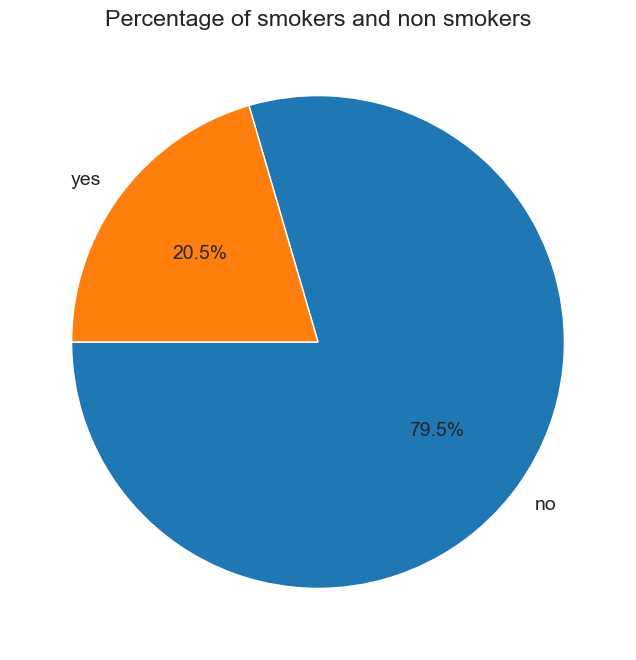

In [87]:
plt.title('Percentage of smokers and non smokers')
smoker_data= medical_df.smoker.value_counts()
plt.pie(smoker_data,labels=smoker_data.index,autopct='%1.1f%%',startangle=180)
plt.rcParams['figure.facecolor'] = '#ffffff'

And can make these other deductions:
* from the data, 20% are smokers
* For non smokers, female are just a little slightly more than men
* For smokers, men are more than women 

In [88]:
fig= px.histogram(
    medical_df,
    x='region',
    color='smoker',
    title='Distibution per region',
    color_discrete_sequence =['red','green']
)
fig.show()

It can be observed that south east has the most smokers, while non smokers have a uniform distibution over all regions.

Data also has almost equal distribution of clients from all regions which makes the data less biased.

### Relationships

We will analyse the different relationships in our data based on out target varible which is: **charges** 

In [89]:
medical_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [90]:
fig = px.scatter(
    medical_df,
    x='age',
    y='charges',
    color='smoker',
    title='Scater plot of age against charges',
    opacity=0.8,
)
fig.update_traces(marker_size =5)
fig.show()

In [91]:
fig = px.scatter(
    medical_df,
    x='age',
    y='charges',
    color='sex',
    title='Scater plot of age against charges',
    opacity=0.8,
)
fig.update_traces(marker_size =6)
fig.show()

In [92]:
fig = px.scatter(
    medical_df,
    x='age',
    y='charges',
    color='region',
    title='Scater plot of age against charges',
    opacity=0.8,
)
fig.update_traces(marker_size =6)
fig.show()

In [93]:
fig = px.scatter(
    medical_df,
    x='age',
    y='charges',
    color='children',
    title='Scater plot of age against charges',
    opacity=0.8,
)
fig.update_traces(marker_size =6)
fig.show()

From the relationship between age and charges we observe the following:
* Generally, there are three clusters of data , low range charges, medium range charges and high charges

* There is a positive correlation between age and charges in all the 3 clusters

* For non-smokers, most of the charges are in the low charge range, with some outliers in the medium charge range

* For smokers, there are two clusters, one in the medium charge range and another in the high charge range with both clusters seeming to have equal number of points.

* Distribution by sex in all 3 clusters is fairly equal.

* Distribution per region is fairly the same except for northwest which has very few int the high charges range, probably some conditions in the north west contibute to that or it coukd be other behavoural factors


All this strongly suggests that smoking behavoir greatly affects charges

In [94]:
fig = px.scatter(
    medical_df,
    x='bmi',
    y='charges',
    color='smoker',
    title='Scater plot of BMI against charges',
    opacity=0.8,
)
fig.update_traces(marker_size =6)
fig.show()

In [95]:
fig = px.scatter(
    medical_df,
    x='bmi',
    y='charges',
    color='region',
    title='Scater plot of BMI against charges',
    opacity=0.8,
)
fig.update_traces(marker_size =6)
fig.show()

In [96]:
fig = px.scatter(
    medical_df,
    x='bmi',
    y='charges',
    color='sex',
    title='Scater plot of BMI against charges',
    opacity=0.8,
)
fig.update_traces(marker_size =6)
fig.show()

From the relationship of bmi and charges, we observe that:

* Generally, there doesnt seem to be a correlation between bmi and charges and this still applies for non-smokers

* For smokers however, for bmi below 30, charges are low, but increase drastically for bmi above 30.


In [97]:
fig = px.scatter(
    medical_df,
    x='children',
    y='charges',
    color='smoker',
    title='Scater plot of no. of children against charges',
    opacity=0.8,
)
fig.update_traces(marker_size =6)
fig.show()

The scatter above isnt very represenatative of the density of points, so we employ a violin to visualize this relationship better

In [98]:
fig = px.violin(
    medical_df,
    x='children',
    y='charges',
    title='Scater plot of no. of children against charges',
)
fig.show()

In [99]:
fig = px.violin(
    medical_df,
    x='smoker',
    y='charges',
    title='Scater plot of smoker against charges',
)
fig.show()

In [100]:
fig = px.violin(
    medical_df,
    x='region',
    y='charges',
    title='Scater plot of region against charges',
)
fig.show()

It can be observed that number of children has a weak positive correaltion with charges. But for all ages, most of the charges are below 20,000

Northwest has most of the charges concentrated in the lower charge range wjile south east has in the lower price rnage but also in the high price range, a good amount of people exist there.

## Machine Learning Model Development

#### Importing the necessary libraries

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
medical_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Trying linear regression with one column

In [103]:
# computing our loss function: RMSE
def get_loss(predictions,targets):
    loss =np.sqrt(np.mean(np.square(predictions - targets)))
    return loss

In [104]:
inputs = medical_df[['age']]
targets = medical_df['charges']

model = LinearRegression()
model.fit(inputs,targets)

LinearRegression()

In [105]:
model.coef_ , model.intercept_

(array([257.72261867]), 3165.8850060630284)

In [106]:
predictions = model.predict(inputs)
get_loss(predictions,targets)

11551.66562075632

The loss is high ($ 11,551.665) because we are using a single variable, we thus need to use multiple of the numeric variables to try to reduce the loss.

#### Using multiple variables

In [108]:
medical_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [109]:
# Defining function to train model and output loss
def fit_predict_loss(train_inputs,train_targets,test_inputs,test_targets):
    model= LinearRegression()
    model.fit(train_inputs,train_targets)

    predictions = model.predict(test_inputs)
    loss = get_loss(predictions,test_targets)
    return loss, model.coef_, model.intercept_

In [110]:
inputs=medical_df[['age','bmi','children']]
targets = medical_df['charges']

fit_predict_loss(inputs,targets,inputs,targets)


(11355.317901125973,
 array([239.99447429, 332.0833645 , 542.86465225]),
 -6916.243347787033)

In [140]:
inputs=medical_df[['age','bmi','children']]
targets = medical_df['charges']
model = LinearRegression().fit(inputs,targets)
model.predict([[36,18,3]])

c:\Users\Kasule BS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([9329.65224459])

Loss has reduced from $11,551.66 to $11,355.31 which is significant but still high overall.

We thus opt to add the smoker column and the region column.

#### Adding categorical columns

Adding the smoker column and sex column(Binary)

In [111]:
smoker_dict = {'yes':1, 'no': 0}
medical_df['smoker_code'] = medical_df['smoker'].map(smoker_dict)

sex_dict = {'male':1, 'female':0}
medical_df['sex_code'] = medical_df['sex'].map(sex_dict)

In [112]:
medical_df.sample(5)

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
281,54,male,40.565,3,yes,northeast,48549.17835,1,1
1217,29,male,37.290,2,no,southeast,4058.11610,0,1
1222,50,male,25.300,0,no,southeast,8442.66700,0,1
728,18,female,40.280,0,no,northeast,2217.60120,0,0
414,19,female,35.150,0,no,northwest,2134.90150,0,0


Making predictions with all columns exept region

In [113]:
inputs=medical_df[['age','bmi','children','smoker_code','sex_code']]
targets = medical_df['charges']

fit_predict_loss(inputs,targets,inputs,targets)


(6056.100708754546,
 array([  257.73498767,   322.36421449,   474.41112061, 23823.39253065,
         -128.63985357]),
 -12052.461985664726)

Addition of a smoker and sex column to the model reduced the loss from $11,355.31 to $6,056.1 which is abit better and more precise.

But the **Regions** column must also be added to make the prediction more accurate.

In [114]:
from sklearn import preprocessing

enc = preprocessing.OneHotEncoder().fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [115]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = enc.transform(medical_df[['region']]).toarray()
medical_df.sample(5)

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
36,62,female,32.965,3,no,northwest,15612.19335,0,0,0.0,1.0,0.0,0.0
1222,50,male,25.300,0,no,southeast,8442.66700,0,1,0.0,0.0,1.0,0.0
95,28,female,37.620,1,no,southeast,3766.88380,0,0,0.0,0.0,1.0,0.0
728,18,female,40.280,0,no,northeast,2217.60120,0,0,1.0,0.0,0.0,0.0
1278,39,male,29.925,1,yes,northeast,22462.04375,1,1,1.0,0.0,0.0,0.0


In [116]:
inputs=medical_df[['age','bmi','children','smoker_code','sex_code','northeast', 'northwest', 'southeast', 'southwest']]
targets = medical_df['charges']

fit_predict_loss(inputs,targets,inputs,targets)


(6041.6796511744515,
 array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
         -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
         -373.04175627]),
 -12525.54781119545)

Addition of the final column of region has reduced the loss further from $6,056.1 to $6,041.67 . This is the best or linear regression model can do.

But to understand the true contribution of each parameter in the prediction of charges, standard scaling on numerical non binary columns is done before fitting the model.

### Standard scaling the features

This occurs on both the inputs for training and for predictions

In [117]:
medical_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast',
       'southwest'],
      dtype='object')

In [118]:
scaler = preprocessing.StandardScaler().fit(medical_df[['age', 'bmi', 'children',
       'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast','southwest']])

inputs= scaler.transform(medical_df[['age', 'bmi', 'children',
       'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast','southwest']])

In [119]:
targets = medical_df['charges']

fit_predict_loss(inputs,targets,inputs,targets)

(6041.679651174452,
 array([3607.47273619, 2067.69196584,  572.99820995, 9623.91280164,
         -65.65358545,  255.21682141,  104.12100257, -195.47635564,
        -156.21923005]),
 13270.422265141258)

Visualising the importance of each feature

In [120]:
features =fit_predict_loss(inputs,targets,inputs,targets)
feature_importance ={
    'feature':['age', 'bmi', 'children','smoker_code', 'sex_code', 'northeast', 'northwest', 
               'southeast','southwest','bias'],
    'weight': [features[1][0],features[1][1],features[1][2],features[1][3],features[1][4],
               features[1][5],features[1][6],features[1][7],features[1][8],features[-1]]
    }
feature_df =pd.DataFrame(feature_importance)
feature_df= feature_df.sort_values('weight',ascending = False ).copy()
feature_df

,feature,weight
9,bias,13270.422265
3,smoker_code,9623.912802
0,age,3607.472736
1,bmi,2067.691966
2,children,572.998210
5,northeast,255.216821
6,northwest,104.121003
4,sex_code,-65.653585
8,southwest,-156.219230
7,southeast,-195.476356


<Axes: title={'center': 'Bar graph illustration the importance of each feature'}, xlabel='weight', ylabel='feature'>

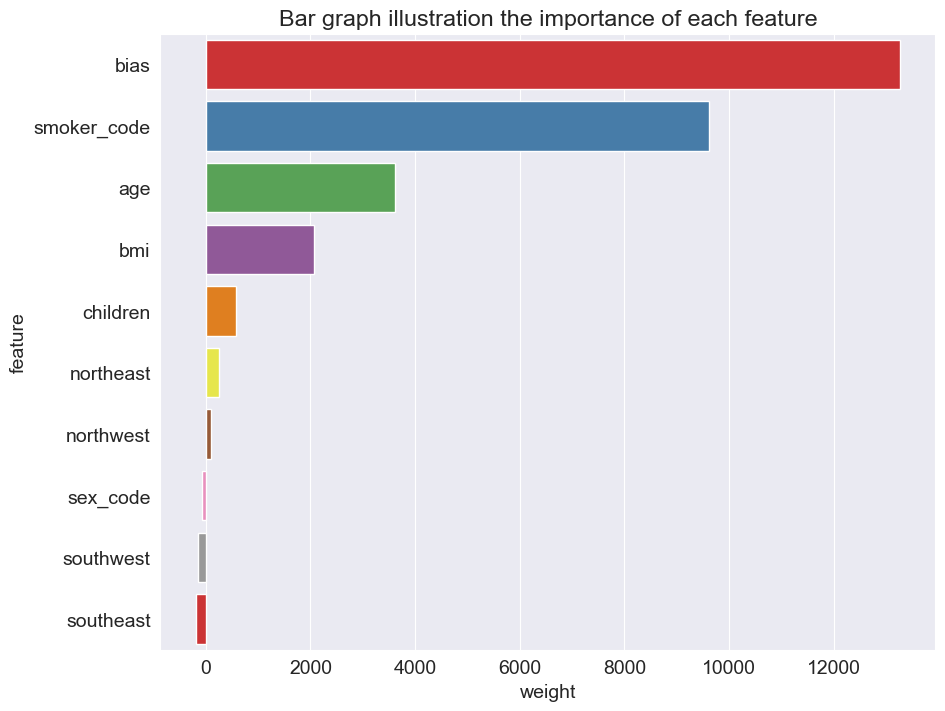

In [121]:
plt.title('Bar graph illustration the importance of each feature')
sns.barplot(data=feature_df, y='feature',x='weight',hue='feature',legend=False,palette='Set1')

We observe from our feature importance visualisation that smoker code has a ver huge significance, we can try to create two seperate models, one for smokers and for non smokers and then scale the inputs and do predictions to see if we can get even a lower loss

In [122]:
medical_df.sample(5)

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
892,54,male,24.035,0,no,northeast,10422.91665,0,1,1.0,0.0,0.0,0.0
712,43,female,30.685,2,no,northwest,8310.83915,0,0,0.0,1.0,0.0,0.0
162,54,male,39.600,1,no,southwest,10450.55200,0,1,0.0,0.0,0.0,1.0
1272,43,male,25.520,5,no,southeast,14478.33015,0,1,0.0,0.0,1.0,0.0
107,26,male,30.875,2,no,northwest,3877.30425,0,1,0.0,1.0,0.0,0.0


In [123]:
smoker_df = medical_df[medical_df.smoker == 'yes'].copy()
non_smoker_df = medical_df[medical_df.smoker == 'no'].copy()

Making a model for smokers and getting its loss

In [124]:
smoker_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast',
       'southwest'],
      dtype='object')

In [125]:
# standard scaling for smoker df
scaler = preprocessing.StandardScaler().fit(smoker_df[['age', 'bmi', 'children', 'sex_code', 
                                                        'northeast', 'northwest', 'southeast','southwest']])
inputs = scaler.transform(smoker_df[['age', 'bmi', 'children', 'sex_code', 
                                                        'northeast', 'northwest', 'southeast','southwest']])
targets = smoker_df['charges']

fit_predict_loss(inputs,targets,inputs,targets)

(5668.4678821121515,
 array([3716.32067545, 9306.41837285,  211.05201133, -191.54233927,
         352.8067272 ,   53.56800173, -504.82923524,  157.25897034]),
 32050.23183153284)

In [126]:
# standard scaling for non smoker df
scaler = preprocessing.StandardScaler().fit(non_smoker_df[['age', 'bmi', 'children', 'sex_code', 
                                                        'northeast', 'northwest', 'southeast','southwest']])
inputs = scaler.transform(non_smoker_df[['age', 'bmi', 'children', 'sex_code', 
                                                        'northeast', 'northwest', 'southeast','southwest']])
targets = non_smoker_df['charges']

fit_predict_loss(inputs,targets,inputs,targets)

(4573.074988795492,
 array([3723.04974709,  114.64713147,  715.26772602, -262.88068788,
         316.43634369,   82.88596368, -110.38365757, -284.08545468]),
 8434.268297856204)

This is very interesting, our model has significantly had reduction in loss just be spliting into two models, one for smokers and another for non smokers:

The loss went from $6,041 to $5,668 and $4,573 for smokers and non-smokers respectively!

We shall the finally do one last check on our model, split the data into a training and testing set and then train our general model and also train our two new models

In [127]:
medical_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast',
       'southwest'],
      dtype='object')

In [128]:
# splitting General model into train test data and training the model

from sklearn.model_selection import train_test_split

scaler = preprocessing.StandardScaler().fit(medical_df[['age', 'bmi', 'children',
       'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast','southwest']])

inputs = scaler.transform(medical_df[['age', 'bmi', 'children',
       'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast','southwest']])

targets = medical_df['charges']

inputs_train,inputs_test,targets_train,targets_test = train_test_split(inputs,targets,test_size=0.1,random_state=41)

fit_predict_loss(inputs_train,targets_train,inputs_test,targets_test)



(5746.538045756185,
 array([ 3.62763073e+03,  2.09429733e+03,  5.72230579e+02,  9.70259759e+03,
         5.52849280e+00,  2.93159710e+02,  1.00422730e+02, -1.68600150e+02,
        -2.18314328e+02]),
 13385.609578657897)

We observe that the loss oscillates, sometimes higher than the non split dataset loss and other times lower. Unless we declare a random state.

In [129]:
# splitting smoker model into train test data and training the model

from sklearn.model_selection import train_test_split

scaler = preprocessing.StandardScaler().fit(smoker_df[['age', 'bmi', 'children', 'sex_code', 
                                                        'northeast', 'northwest', 'southeast','southwest']])
inputs = scaler.transform(smoker_df[['age', 'bmi', 'children', 'sex_code', 
                                                        'northeast', 'northwest', 'southeast','southwest']])
targets = smoker_df['charges']

inputs_train,inputs_test,targets_train,targets_test = train_test_split(inputs,targets,test_size=0.1,random_state=42)

fit_predict_loss(inputs_train,targets_train,inputs_test,targets_test)



(5648.51020148573,
 array([3621.03835624, 9137.9763426 ,  188.66601233, -176.95927907,
         269.22499845,  105.58940224, -388.92819744,   59.55237345]),
 31999.228636338903)

In [130]:
# splitting smoker model into train test data and training the model

from sklearn.model_selection import train_test_split

scaler = preprocessing.StandardScaler().fit(non_smoker_df[['age', 'bmi', 'children', 'sex_code', 
                                                        'northeast', 'northwest', 'southeast','southwest']])
inputs = scaler.transform(non_smoker_df[['age', 'bmi', 'children', 'sex_code', 
                                                        'northeast', 'northwest', 'southeast','southwest']])
targets = non_smoker_df['charges']

inputs_train,inputs_test,targets_train,targets_test = train_test_split(inputs,targets,test_size=0.1,random_state=42)

fit_predict_loss(inputs_train,targets_train,inputs_test,targets_test)



(3439.376657867329,
 array([3751.09259421,  110.07257744,  745.39137989, -228.36556793,
         324.67829573,  119.63134978, -120.28028499, -318.99807846]),
 8490.385471424943)

All values oscillate when the data is split into training and testing sets. But with random state incoporated, the loss is low and the models are better.

#### Using SGDRegressor instead of Ordinary Least Squares

In [131]:
from sklearn.linear_model import SGDRegressor

# Defining function to train model and output loss
def fit_predict_loss(train_inputs,train_targets,test_inputs,test_targets):
    model= SGDRegressor(random_state=42,penalty='l2',max_iter=1000,tol=1e-2,loss='squared_error')
    model.fit(train_inputs,train_targets)

    predictions = model.predict(test_inputs)
    loss = get_loss(predictions,test_targets)
    return loss, model.coef_, model.intercept_

In [132]:
# splitting General model into train test data and training the model

from sklearn.model_selection import train_test_split

scaler = preprocessing.StandardScaler().fit(medical_df[['age', 'bmi', 'children',
       'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast','southwest']])

inputs = scaler.transform(medical_df[['age', 'bmi', 'children',
       'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast','southwest']])

targets = medical_df['charges']

inputs_train,inputs_test,targets_train,targets_test = train_test_split(inputs,targets,test_size=0.1,random_state=41)

fit_predict_loss(inputs_train,targets_train,inputs_test,targets_test)



(5759.426601539395,
 array([3712.20187694, 2091.85215019,  561.32669799, 9680.43055541,
          42.38316094,  250.295542  ,  182.26999207, -164.24294232,
        -261.86389731]),
 array([13409.85173397]))